In [17]:
#pip install qrcode

Shape: (29, 29)


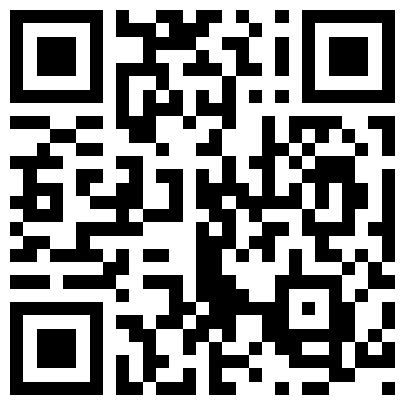

5.800000000000001 mm


In [49]:
import qrcode
import numpy as np
import matplotlib.pyplot as plt

def qr_to_numpy_auto(data: str) -> np.ndarray:
    # Create QR with automatic version selection
    qr = qrcode.QRCode(
        version=None,  # automatic sizing depending on input length
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=1,
        border=0,
    )
    qr.add_data(data)
    qr.make(fit=True)

    # Extract the raw boolean matrix from qrcode
    matrix = qr.get_matrix()  # list of lists of bools

    # Convert to 0/1 NumPy array
    arr = np.array(matrix, dtype=np.uint8)
    return arr


s = "Abdelaziz BOUZIANI 2025 github.com/BOAB235"
#s=s.replace(" ","_")
arr = qr_to_numpy_auto(s)

print("Shape:",arr.shape)
# --- Plot with matplotlib ---
plt.figure(figsize=(5, 5))
plt.imshow(arr, cmap='gray_r', interpolation='nearest')
plt.axis('off')
plt.show()


step = 0.2 # mm
print(arr.shape[0]*0.2,"mm")

In [53]:
from copy import copy 
txt = """
(kicad_pcb
	(version 20241229)
	(generator "pcbnew")
	(generator_version "9.0")
	(general
		(thickness 1.6)
		(legacy_teardrops no)
	)
	(paper "A4")
	(layers
		(0 "F.Cu" signal)
		(4 "In1.Cu" signal)
		(6 "In2.Cu" signal)
		(2 "B.Cu" signal)
		(9 "F.Adhes" user "F.Adhesive")
		(11 "B.Adhes" user "B.Adhesive")
		(13 "F.Paste" user)
		(15 "B.Paste" user)
		(5 "F.SilkS" user "F.Silkscreen")
		(7 "B.SilkS" user "B.Silkscreen")
		(1 "F.Mask" user)
		(3 "B.Mask" user)
		(17 "Dwgs.User" user "User.Drawings")
		(19 "Cmts.User" user "User.Comments")
		(21 "Eco1.User" user "User.Eco1")
		(23 "Eco2.User" user "User.Eco2")
		(25 "Edge.Cuts" user)
		(27 "Margin" user)
		(31 "F.CrtYd" user "F.Courtyard")
		(29 "B.CrtYd" user "B.Courtyard")
		(35 "F.Fab" user)
		(33 "B.Fab" user)
		(39 "User.1" user)
		(41 "User.2" user)
		(43 "User.3" user)
		(45 "User.4" user)
	)
	(setup
		(stackup
			(layer "F.SilkS"
				(type "Top Silk Screen")
			)
			(layer "F.Paste"
				(type "Top Solder Paste")
			)
			(layer "F.Mask"
				(type "Top Solder Mask")
				(thickness 0.01)
			)
			(layer "F.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "dielectric 1"
				(type "prepreg")
				(thickness 0.1)
				(material "FR4")
				(epsilon_r 4.5)
				(loss_tangent 0.02)
			)
			(layer "In1.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "dielectric 2"
				(type "core")
				(thickness 1.24)
				(material "FR4")
				(epsilon_r 4.5)
				(loss_tangent 0.02)
			)
			(layer "In2.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "dielectric 3"
				(type "prepreg")
				(thickness 0.1)
				(material "FR4")
				(epsilon_r 4.5)
				(loss_tangent 0.02)
			)
			(layer "B.Cu"
				(type "copper")
				(thickness 0.035)
			)
			(layer "B.Mask"
				(type "Bottom Solder Mask")
				(thickness 0.01)
			)
			(layer "B.Paste"
				(type "Bottom Solder Paste")
			)
			(layer "B.SilkS"
				(type "Bottom Silk Screen")
			)
			(copper_finish "None")
			(dielectric_constraints no)
		)
        )








	(gr_circle
		(center 0 0)
		(end -8.58 -55.86)
		(stroke
			(width 1)
			(type default)
		)
		(fill no)
		(layer "F.Cu")

	)


    
"""

txt_rec="""
	(gr_rect
		(start xs_ ys_)
		(end   xe_ ye_)
		(stroke (width 0) (type solid))
		(fill yes)
		(layer "F.Cu")
	)
"""

In [54]:
arr.shape

(29, 29)

In [55]:
step =0.2 # mm
x, y =0,0
txto= copy(txt)
for i in range(arr.shape[0]):
    x= i*step 
    for j in range(arr.shape[1]):
        y = j*step
        #pass
        #print(x, y)
        if arr[i][j]:
            xs, ys=x, y
            xe,ye=xs+step,ys+step
            txto += txt_rec.replace ("xs_",str(xs)).\
                replace ("ys_",str(ys)).\
                replace ("xe_",str(xe)).\
                replace ("ye_",str(ye))


        
txto+= "\n)"


with open("QR_code.kicad_pcb", "w") as f: 
    f.write(txto)